<a href="https://colab.research.google.com/github/wazeer23/Portfolio/blob/main/Multi-Class%20Text%20Classification%20using%20Various%20Machine%20Learning%20Algorithims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Text Classification
CFPB - Consumer Complaints Database

# 1. Loading the Dataset

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
#df = pd.read_csv('complaint.csv')
df = pd.read_csv('/content/drive/My Drive/complaint.csv')
#df = pd.read_csv('complaint.csv',engine='python', error_bad_lines=False)

In [ ]:
df = df.sample(frac=0.2, random_state=1)

In [ ]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
6788,07/08/20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,XXXX ; XXXX and Transunion should not be rep...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WA,982XX,None,Consent provided,Web,07/08/20,Closed with explanation,Yes,NaN,3734758
4029,07/06/20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I sent multiple credit disputes with these com...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AR,720XX,None,Consent provided,Web,07/06/20,Closed with explanation,Yes,NaN,3731381
2411,06/22/20,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,My credit card was charged to an ATM withdrawa...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,754XX,"Older American, Servicemember",Consent provided,Web,06/22/20,Closed with monetary relief,Yes,NaN,3710405
12130,07/28/20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"THERE ARE SEVERAL ALLEGED COLLECTION, CHARGE A...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",KY,410XX,None,Consent provided,Web,07/28/20,Closed with explanation,Yes,NaN,3767349
14130,07/20/20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I went to file my taxes and I was told by my c...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AR,None,None,Consent provided,Web,07/20/20,Closed with explanation,Yes,NaN,3753840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,07/26/20,Debt collection,Other debt,Communication tactics,Frequent or repeated calls,Repeated calls. Ive attempted to settle with n...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",IL,616XX,None,Consent provided,Web,07/26/20,Closed with explanation,Yes,NaN,3764931
3774,07/25/20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"AFTER A CAREFUL REVIEW OF MY CREDIT REPORT, I ...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,331XX,None,Consent provided,Web,07/25/20,Closed with explanation,Yes,NaN,3764115
3216,08/11/20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,I FILED A DISPUTE WITH THE CREDIT REPORTING AG...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,606XX,None,Consent provided,Web,08/11/20,Closed with explanation,Yes,NaN,3790529
8077,06/24/20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I was shocked when I reviewed my credit report...,Company has responded to the consumer and the ...,U.S. BANCORP,MA,023XX,None,Consent provided,Web,06/24/20,Closed with explanation,Yes,NaN,3715065


In [ ]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    2013
Debt collection                                                                  280
Credit card or prepaid card                                                      190
Mortgage                                                                         162
Checking or savings account                                                      115
Vehicle loan or lease                                                             29
Money transfer, virtual currency, or money service                                28
Payday loan, title loan, or personal loan                                         20
Student loan                                                                      10
Name: Product, dtype: int64

In [ ]:
df = df[['Product','Consumer complaint narrative']]

In [ ]:
df

,Product,Consumer complaint narrative
6788,"Credit reporting, credit repair services, or o...",XXXX ; XXXX and Transunion should not be rep...
4029,"Credit reporting, credit repair services, or o...",I sent multiple credit disputes with these com...
2411,Credit card or prepaid card,My credit card was charged to an ATM withdrawa...
12130,"Credit reporting, credit repair services, or o...","THERE ARE SEVERAL ALLEGED COLLECTION, CHARGE A..."
14130,"Credit reporting, credit repair services, or o...",I went to file my taxes and I was told by my c...
...,...,...
594,Debt collection,Repeated calls. Ive attempted to settle with n...
3774,"Credit reporting, credit repair services, or o...","AFTER A CAREFUL REVIEW OF MY CREDIT REPORT, I ..."
3216,"Credit reporting, credit repair services, or o...",I FILED A DISPUTE WITH THE CREDIT REPORTING AG...
8077,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...


In [ ]:
df = df.dropna()


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re

In [ ]:
!pip install swifter

     |████████████████████████████████| 460kB 4.8MB/s 
     |████████████████████████████████| 389kB 10.9MB/s 
     |████████████████████████████████| 21.9MB 194kB/s 
     |████████████████████████████████| 655kB 60.6MB/s 
     |████████████████████████████████| 92kB 11.3MB/s 
     |████████████████████████████████| 2.9MB 63.0MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 1.2MB 59.3MB/s 
     |████████████████████████████████| 266kB 62.2MB/s 
     |████████████████████████████████| 153kB 60.5MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
  Created wheel for psutil: filename=psutil-5.7.2-cp36-cp36m-linux_x86_64.whl size=279887 sha256=b2fbad3cd919df2bdf88d00ec381a20fc74c3259f2b4b63e8c3e085d3b5dd0c0
  Stored in directory: /root/.cache/pip/wheels/39/a0/f5/c4fa280463e29aea07797acb5312358fefb067c1f4f98e11b1
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=6c50f23ba570adea8f7431c0a7

# 2. Clean the Text

In [ ]:
#Change text to lower case, remove punctuation, remove bad characters

from nltk.corpus import stopwords
import swifter
#swifter ensures the fastest processing by utilizing all of the cores of our Vcpu
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    return text


In [ ]:
df['clean'] = df['Consumer complaint narrative'].swifter.apply(clean_text)

In [ ]:
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def lemmatize(text):
  """Perform lemmatization and stopword removal in clean text"""
  doc = nlp(text)
  lemma_list = [str(tok.lemma_).lower() for tok in doc
                if tok.is_alpha and tok.text.lower() not in STOPWORDS]
  return lemma_list

In [ ]:
%%time
df['lemmatize'] = df['clean'].swifter.apply(lemmatize)


CPU times: user 1min 32s, sys: 670 ms, total: 1min 33s
Wall time: 1min 33s


In [ ]:
#return back to string without brackets
df['clean_text'] = [' '.join(map(str,l)) for l in df['lemmatize']] 

In [ ]:
df

,Product,Consumer complaint narrative,clean,lemmatize,clean_text
0,"Credit reporting, credit repair services, or o...",XXXX ; XXXX and Transunion should not be rep...,and transunion should not be reporting a...,"[transunion, report, collection, amount, accou...",transunion report collection amount account or...
1,"Credit reporting, credit repair services, or o...",I sent multiple credit disputes with these com...,i sent multiple credit disputes with these com...,"[send, multiple, credit, dispute, company, ask...",send multiple credit dispute company ask inves...
2,Credit card or prepaid card,My credit card was charged to an ATM withdrawa...,my credit card was charged to an atm withdrawa...,"[credit, card, charge, atm, withdrawal, make, ...",credit card charge atm withdrawal make authori...
3,"Credit reporting, credit repair services, or o...","THERE ARE SEVERAL ALLEGED COLLECTION, CHARGE A...",there are several alleged collection charge a...,"[several, alleged, collection, charge, unknown...",several alleged collection charge unknown inqu...
4,"Credit reporting, credit repair services, or o...",I went to file my taxes and I was told by my c...,i went to file my taes and i was told by my co...,"[go, file, tae, tell, consultant, social, secu...",go file tae tell consultant social security us...
...,...,...,...,...,...
2842,Debt collection,Repeated calls. Ive attempted to settle with n...,repeated calls ive attempted to settle with no...,"[repeat, call, attempt, settle, resolution, re...",repeat call attempt settle resolution remove a...
2843,"Credit reporting, credit repair services, or o...","AFTER A CAREFUL REVIEW OF MY CREDIT REPORT, I ...",after a careful review of my credit report i ...,"[careful, review, credit, report, identify, in...",careful review credit report identify inaccura...
2844,"Credit reporting, credit repair services, or o...",I FILED A DISPUTE WITH THE CREDIT REPORTING AG...,i filed a dispute with the credit reporting ag...,"[file, dispute, credit, reporting, agency, reg...",file dispute credit reporting agency regard in...
2845,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...,i was shocked when i reviewed my credit report...,"[shocked, review, credit, report, find, late, ...",shocked review credit report find late payment...


In [ ]:
#original text
df['Consumer complaint narrative'][0]

'XXXX  ; XXXX  and Transunion should not be reporting a collection in the amount of {$740.00} on the XXXX XXXX XXXX XXXX account, original account holder XXXX XXXX XXXX XXXX partial account number XXXX. ( Please see page attached from my credit report, along with a copy of my Drivers License for identification purposes. ) This is military housing and our housing is paid for by allotment. When we vacated the premises there was no outstanding balance due and therefore nothing to collect. This account needs to report a {$0.00} balance due. It is a violation of the Fair Credit Reporting Act to no report accurate information on a credit report. This false reporting of a collection is seriously harming my credit score and this line item needs to be removed from my credit report. I have contacted the bureaus to remove this however, I have not been successful.'

In [ ]:
#processed text
df['clean_text'][0]

'transunion report collection amount account original account holder partial account number please see page attach credit report along copy driver license identification purpose military housing housing pay allotment vacate premise outstanding balance due therefore nothing collect account need report balance due violation fair credit reporting act report accurate information credit report false reporting collection seriously harm credit score line item need remove credit report contact bureaus remove however successful'

In [ ]:
df

,Product,Consumer complaint narrative,clean,lemmatize,clean_text
0,"Credit reporting, credit repair services, or o...",XXXX ; XXXX and Transunion should not be rep...,and transunion should not be reporting a...,"[transunion, report, collection, amount, accou...",transunion report collection amount account or...
1,"Credit reporting, credit repair services, or o...",I sent multiple credit disputes with these com...,i sent multiple credit disputes with these com...,"[send, multiple, credit, dispute, company, ask...",send multiple credit dispute company ask inves...
2,Credit card or prepaid card,My credit card was charged to an ATM withdrawa...,my credit card was charged to an atm withdrawa...,"[credit, card, charge, atm, withdrawal, make, ...",credit card charge atm withdrawal make authori...
3,"Credit reporting, credit repair services, or o...","THERE ARE SEVERAL ALLEGED COLLECTION, CHARGE A...",there are several alleged collection charge a...,"[several, alleged, collection, charge, unknown...",several alleged collection charge unknown inqu...
4,"Credit reporting, credit repair services, or o...",I went to file my taxes and I was told by my c...,i went to file my taes and i was told by my co...,"[go, file, tae, tell, consultant, social, secu...",go file tae tell consultant social security us...
...,...,...,...,...,...
2842,Debt collection,Repeated calls. Ive attempted to settle with n...,repeated calls ive attempted to settle with no...,"[repeat, call, attempt, settle, resolution, re...",repeat call attempt settle resolution remove a...
2843,"Credit reporting, credit repair services, or o...","AFTER A CAREFUL REVIEW OF MY CREDIT REPORT, I ...",after a careful review of my credit report i ...,"[careful, review, credit, report, identify, in...",careful review credit report identify inaccura...
2844,"Credit reporting, credit repair services, or o...",I FILED A DISPUTE WITH THE CREDIT REPORTING AG...,i filed a dispute with the credit reporting ag...,"[file, dispute, credit, reporting, agency, reg...",file dispute credit reporting agency regard in...
2845,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...,i was shocked when i reviewed my credit report...,"[shocked, review, credit, report, find, late, ...",shocked review credit report find late payment...


# 3. Prepare text for Machine Learning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df['clean_text']

In [ ]:
y = df['Product']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
vectorizer = TfidfVectorizer(stop_words = STOPWORDS)

# 4. Create Machine Learning Pipeline

In [ ]:
pipelinerfc = Pipeline([('vect', vectorizer),
                    ('chi', SelectKBest(chi2)),
                    ('clf', RandomForestClassifier(n_jobs = -1))])

In [ ]:
from xgboost import XGBClassifier

pipelinexgb = Pipeline([('vect', vectorizer),
                    ('chi', SelectKBest(chi2)),
                    ('clf', XGBClassifier(n_jobs = -1))])

# 5. Hyperparameter Optimization

In [ ]:

# A parameter grid for Random Forest
parameters_pipeline_rfc = {'vect__max_df': (0.25, 0.5),
                       'vect__max_features': (10000, None),
                       'vect__sublinear_tf': (True, False),
                       'vect__smooth_idf': (True, False),
                       'chi__k':(1500, 2000),
                       'clf__n_estimators':(100,250,500),
                       'clf__max_depth':(5,15,None),
                       'clf__min_samples_split':(2,3),
                       'clf__min_samples_leaf':(1,2)  } 


# A parameter grid for XGBoost
parameters_pipeline_xgb = {'vect__max_df': (0.25, 0.5),
                       'vect__max_features': (10000, None),
                       'vect__sublinear_tf': (True, False),
                       'vect__smooth_idf': (True, False),
                       'chi__k':(1500, 2000),
                       'clf__min_child_weight': [1, 5],
                       'clf__gamma': [0.5, 2, 3],
                       'clf__subsample': [0.6, 0.8, 1.0],
                       'clf__max_depth': [3, 4, 5] } 





                       
                       

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search_rfc = GridSearchCV(pipelinerfc, parameters_pipeline_rfc, n_jobs=-1, cv=5, verbose = 10)

In [ ]:
grid_search_xgb = GridSearchCV(pipelinexgb, parameters_pipeline_xgb, n_jobs=-1, cv=5, verbose = 10)

In [ ]:
import timeit

In [ ]:
start_time = timeit.default_timer()

In [ ]:
grid_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [ ]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [ ]:
import timeit

In [ ]:
print ('Best Training score: %0.3f' % grid_search_rfc.best_score_)

Best Training score: 0.782


In [ ]:
print ('Best Training score: %0.3f' % grid_search_xgb.best_score_)

Best Training score: 0.845


In [ ]:
grid_search_rfc.best_params_

{'chi__k': 1500,
 'clf__max_depth': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 3,
 'clf__n_estimators': 100,
 'vect__max_df': 0.5,
 'vect__max_features': None,
 'vect__smooth_idf': False,
 'vect__sublinear_tf': True}

In [ ]:
grid_search_xgb.best_params_

{'chi__k': 1500,
 'clf__gamma': 0.5,
 'clf__max_depth': 5,
 'clf__min_child_weight': 1,
 'clf__subsample': 0.6,
 'vect__max_df': 0.5,
 'vect__max_features': 10000,
 'vect__smooth_idf': True,
 'vect__sublinear_tf': True}

In [ ]:
vectorizerrfc = TfidfVectorizer(stop_words = STOPWORDS, max_df = 0.5, max_features = None, smooth_idf = False, sublinear_tf = True)

In [ ]:
vectorizerxgb = TfidfVectorizer(stop_words = STOPWORDS, max_df = 0.25, max_features = None, smooth_idf = True, sublinear_tf = True)

In [ ]:
pipelinerfc = Pipeline([('vect', vectorizerrfc),
                    ('chi', SelectKBest(chi2, k = 1500)),
                    ('clf', RandomForestClassifier(min_samples_leaf = 1, min_samples_split = 3, n_estimators = 100,n_jobs = -1))])

In [ ]:
pipelinexgb = Pipeline([('vect', vectorizerxgb),
                    ('chi', SelectKBest(chi2, k = 1500)),
                    ('clf', XGBClassifier(n_jobs = -1, gamma = 0.5, max_depth = 5, min_child_weight= 1, subsample= 0.6))])


 

In [ ]:
import pickle

In [ ]:
import numpy as np

In [ ]:
rfc = pipelinerfc.fit(X_train, y_train)
with open('rfc.pickle', 'wb') as f:
    pickle.dump(rfc, f)
    
ytest = np.array(y_test)

In [ ]:
xgb = pipelinexgb.fit(X_train, y_train)
with open('xgb.pickle', 'wb') as f:
    pickle.dump(xgb, f)
    
ytest = np.array(y_test)

In [ ]:
import os

from sklearn import metrics

# 6. Evaluate Model Results

In [ ]:
print(confusion_matrix(ytest, rfc.predict(X_test)))

print(classification_report(ytest, rfc.predict(X_test)))

[[  6   2  15   0   0   1   0   0   0]
 [  1  14  22   0   0   0   0   0   0]
 [  0   4 405   3   0   2   0   0   0]
 [  0   1  31  23   0   0   0   0   0]
 [  1   0   2   0   0   0   0   0   0]
 [  0   0  13   0   0  14   0   0   0]
 [  0   0   4   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0   0]]
                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.75      0.25      0.38        24
                                                 Credit card or prepaid card       0.67      0.38      0.48        37
Credit reporting, credit repair services, or other personal consumer reports       0.81      0.98      0.89       414
                                                             Debt collection       0.88      0.42      0.57        55
                          Money transfer, virtual currenc

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

rfc_acc


0.8105263157894737

In [ ]:
rfc_bal_acc = balanced_accuracy_score(y_test, rfc.predict(X_test))

rfc_bal_acc

0.28259328718265914

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Random Forest')

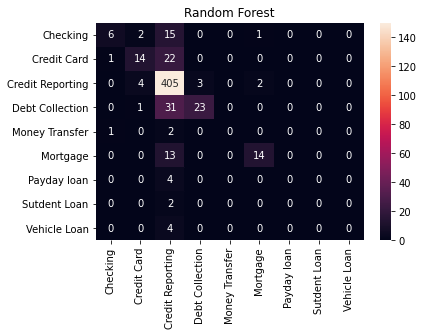

In [ ]:
cf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['Checking', 'Credit Card', 'Credit Reporting', 'Debt Collection','Money Transfer', 'Mortgage','Payday loan','Sutdent Loan','Vehicle Loan']
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt = 'd', vmax = 150)
ax = plt.axes()
ax.set_title('Random Forest')

In [ ]:
print(confusion_matrix(ytest, xgb.predict(X_test)))

print(classification_report(ytest, xgb.predict(X_test)))

[[ 11   2  10   0   0   1   0   0   0]
 [  1  23  13   0   0   0   0   0   0]
 [  1   6 393   6   0   6   0   1   1]
 [  0   1  17  37   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0   0]
 [  0   0   9   1   0  17   0   0   0]
 [  0   0   2   0   0   2   0   0   0]
 [  0   0   2   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0   0]]
                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.73      0.46      0.56        24
                                                 Credit card or prepaid card       0.70      0.62      0.66        37
Credit reporting, credit repair services, or other personal consumer reports       0.87      0.95      0.91       414
                                                             Debt collection       0.84      0.67      0.75        55
                          Money transfer, virtual currenc

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'XGBoost')

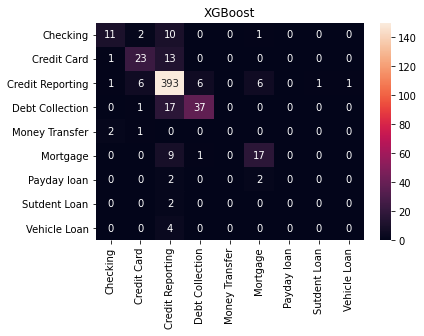

In [ ]:
cf_matrix = confusion_matrix(y_test, xgb.predict(X_test))
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt = 'd', vmax = 150)
ax = plt.axes()
ax.set_title('XGBoost')

In [ ]:

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))


xgb_acc


0.843859649122807

In [ ]:
xgb_bal_acc = balanced_accuracy_score(y_test, xgb.predict(X_test))

xgb_bal_acc

0.37017635773674423

# 8. LSTM Model

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6789 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['clean_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2847, 250)


In [ ]:

Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2847, 9)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2277, 250) (2277, 9)
(570, 250) (570, 9)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(9, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = [10, 30, 60]
epochs = [10, 25, 30]

param_grid = dict(batch_size=batch_size, epochs=epochs)


In [ ]:
lstm_model = KerasClassifier(build_fn=create_model, verbose=10)


In [ ]:
grid_lstm = GridSearchCV(estimator=lstm_model, param_grid=param_grid, n_jobs=-1, cv=5)

grid_result = grid_lstm.fit(X, Y)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.778011 using {'batch_size': 30, 'epochs': 10}


In [ ]:
  model = Sequential()
  model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(9, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 9)                 909       
Total params: 5,081,309
Trainable params: 5,081,309
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#change htis
epochs = 10
batch_size = 30

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/10
69/69 [==============================] - 26s 382ms/step - loss: 1.2598 - accuracy: 0.6920 - val_loss: 0.9407 - val_accuracy: 0.7149
Epoch 2/10
69/69 [==============================] - 26s 375ms/step - loss: 0.8319 - accuracy: 0.7194 - val_loss: 0.8278 - val_accuracy: 0.7149
Epoch 3/10
69/69 [==============================] - 28s 411ms/step - loss: 0.6564 - accuracy: 0.7726 - val_loss: 0.8501 - val_accuracy: 0.7149
Epoch 4/10
69/69 [==============================] - 25s 365ms/step - loss: 0.5508 - accuracy: 0.8126 - val_loss: 0.9302 - val_accuracy: 0.7061
Epoch 5/10
69/69 [==============================] - 27s 386ms/step - loss: 0.4347 - accuracy: 0.8516 - val_loss: 1.0091 - val_accuracy: 0.7105
Epoch 6/10
69/69 [==============================] - 25s 359ms/step - loss: 0.3662 - accuracy: 0.8848 - val_loss: 0.9828 - val_accuracy: 0.7368
Epoch 7/10
69/69 [==============================] - 25s 360ms/step - loss: 0.2683 - accuracy: 0.9126 - val_loss: 1.1365 - val_accuracy: 0.7061

In [ ]:
test_pred =  model.predict(X_test)

In [ ]:
import numpy as np
rounded_test=np.argmax(Y_test, axis=1)
rounded_test[1]

5

In [ ]:
test_pred =  model.predict(X_test)

In [ ]:
import numpy as np
rounded_pred=np.argmax(test_pred, axis=1)
rounded_pred[1]

5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'lstm')

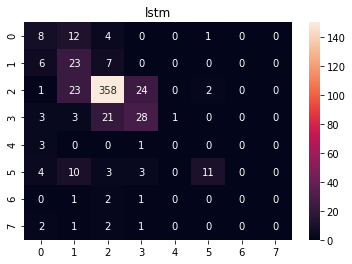

In [ ]:
cf_matrix = confusion_matrix(rounded_test, rounded_pred)
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['Checking', 'Credit Card', 'Credit Reporting', 'Debt Collection','Money Transfer', 'Mortgage','Payday loan','Sutdent Loan']
sns.heatmap(cf_matrix, annot=True, fmt = 'd', vmax = 150)
ax = plt.axes()
ax.set_title('lstm')

In [ ]:
print(confusion_matrix(rounded_test, rounded_pred))

print(classification_report(rounded_test, rounded_pred))

[[  8  12   4   0   0   1   0   0]
 [  6  23   7   0   0   0   0   0]
 [  1  23 358  24   0   2   0   0]
 [  3   3  21  28   1   0   0   0]
 [  3   0   0   1   0   0   0   0]
 [  4  10   3   3   0  11   0   0]
 [  0   1   2   1   0   0   0   0]
 [  2   1   2   1   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.30      0.32      0.31        25
           1       0.32      0.64      0.42        36
           2       0.90      0.88      0.89       408
           3       0.48      0.50      0.49        56
           4       0.00      0.00      0.00         4
           5       0.79      0.35      0.49        31
           6       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         6

    accuracy                           0.75       570
   macro avg       0.35      0.34      0.32       570
weighted avg       0.77      0.75      0.75       570



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

rfc_acc = accuracy_score(rounded_test, rounded_pred)

In [ ]:
from sklearn.metrics import accuracy_score

lstm_acc = accuracy_score(rounded_test, rounded_pred)


lstm_bal_acc = balanced_accuracy_score(rounded_test, rounded_pred)



In [ ]:
lstm_acc

0.7508771929824561

In [ ]:
from sklearn.metrics import balanced_accuracy_score

lstm_bal_acc = balanced_accuracy_score(rounded_test, rounded_labels)

rfc_bal_acc = balanced_accuracy_score((y_test, xgb.predict(X_test)

xgb_bal_acc = balanced_accuracy_score((y_test, xgb.predict(Y_test)

lstm_bal_acc

0.3333333333333333

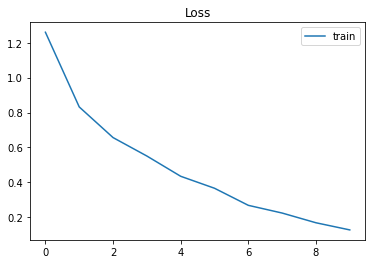

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show();

# Compare Models

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

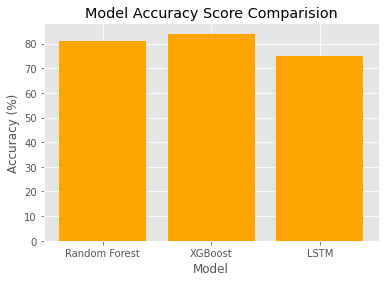

In [ ]:
%matplotlib inline
plt.style.use('ggplot')

x = ['Random Forest', 'XGBoost', 'LSTM']
score = [81, 84, 75]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, score, color='orange')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Score Comparision")

plt.xticks(x_pos, x)

plt.show()

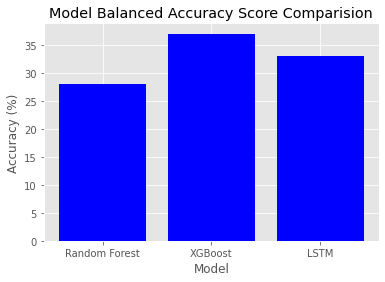

In [ ]:
%matplotlib inline
plt.style.use('ggplot')

x = ['Random Forest', 'XGBoost', 'LSTM']
score = [28, 37, 33]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, score, color='Blue')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Balanced Accuracy Score Comparision")

plt.xticks(x_pos, x)

plt.show()

# 9. Pretrained BERT Model

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 1.2MB/s 
     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 983kB 58.4MB/s 
     |████████████████████████████████| 245kB 59.4MB/s 
     |████████████████████████████████| 778kB 59.6MB/s 
     |████████████████████████████████| 471kB 58.3MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 3.9MB 58.1MB/s 
     |████████████████████████████████| 450kB 55.2MB/s 
     |████████████████████████████████| 1.1MB 58.5MB/s 
     |████████████████████████████████| 3.0MB 60.9MB/s 
     |████████████████████████████████| 890kB 61.9MB/s 
  Created wheel for ktrain: filename=ktrain-0.20.2-cp36-none-any.whl size=25268858 sha256=80102b75a1f830c9562b4f6ab6cbabb0c9e72069482fad49d7eb445d60714085
  Stored in directory: /root/.cache/pip/wheels/39/cb/df/46a2a4009de6e87d908d89dabdd78216bf7396eb2150ca1bfc
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none

In [ ]:
import ktrain
from ktrain import text as txt

In [ ]:

# load data
(x_train, y_train), (x_test, y_test), preproc = txt.texts_from_df(df, text_column= 'Consumer complaint narrative', label_columns = 'Product', maxlen=500, 
                                                                     preprocess_mode='bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
# load model
model = txt.text_classifier('bert', (x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
# wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
427/427 [==============================] - 1686s 4s/step - loss: 1.4681 - accuracy: 0.5016
Epoch 2/1024
427/427 [==============================] - 1766s 4s/step - loss: 0.8564 - accuracy: 0.7455
Epoch 3/1024
427/427 [==============================] - 1679s 4s/step - loss: 4.3294 - accuracy: 0.6120


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


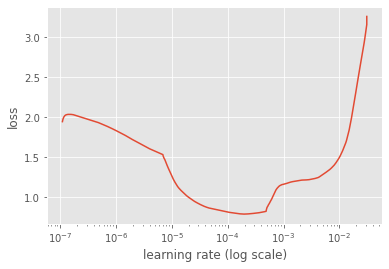

In [ ]:

# find good learning rate
learner.lr_find()             # briefly simulate training to find good learning rate
learner.lr_plot()             # visually identify best learning rate

In [ ]:

# train using 1cycle learning rate schedule for 3 epochs
learner.fit_onecycle(2e-5, 3) 



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
427/427 [==============================] - 1729s 4s/step - loss: 0.9719 - accuracy: 0.7022 - val_loss: 0.6993 - val_accuracy: 0.7368
Epoch 2/3
427/427 [==============================] - 1711s 4s/step - loss: 0.5582 - accuracy: 0.8271 - val_loss: 0.4479 - val_accuracy: 0.8351
Epoch 3/3
427/427 [==============================] - 1712s 4s/step - loss: 0.2831 - accuracy: 0.9149 - val_loss: 0.4257 - val_accuracy: 0.8596


In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=y_train.target_names)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.79      0.58      0.67        19
           2       0.90      0.96      0.93       208
           3       0.75      0.60      0.67        30
           4       0.00      0.00      0.00         4
           5       0.71      0.71      0.71        14
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         1

    accuracy                           0.86       285
   macro avg       0.58      0.57      0.57       285
weighted avg       0.84      0.86      0.85       285



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  5,   1,   0,   0,   0,   1,   0,   0],
       [  1,  11,   7,   0,   0,   0,   0,   0],
       [  0,   0, 200,   6,   0,   2,   0,   0],
       [  0,   1,  10,  18,   0,   1,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   2,   0,   0,  10,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1]])

In [ ]:
!jupyter nbconvert --to html test.ipynb

[NbConvertApp] WARNING | pattern u'test.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nbconver